In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [6]:
data = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\processed\Interaction_data.csv')
data

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,...,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC,country_Canada,country_France,country_Spain,country_United Kingdom,country_United States
0,-0.682759,-0.016546,0.791535,0.057601,0.034293,-0.597253,-0.890585,-0.661914,-1.027182,-0.693202,...,0.395331,0.407780,0.679907,0.712044,0.458840,0,0,0,1,0
1,-0.805610,-0.867650,-0.306244,-0.590343,-0.136334,-0.597253,-0.781038,-0.043792,-0.523716,-0.082494,...,0.026155,0.481154,0.022934,0.043203,0.003613,1,0,0,0,0
2,-1.924921,-0.781097,1.801099,0.515501,-0.369007,-0.087263,-1.624860,-1.199049,0.665620,-1.052757,...,0.104633,0.167975,-0.798111,-0.700736,1.262307,1,0,0,0,0
3,0.695903,0.488347,-0.414061,0.156364,-0.369007,0.422727,0.598133,-0.266052,0.473192,-0.131954,...,-0.112467,0.294177,-0.125894,-0.062440,0.035107,1,0,0,0,0
4,-0.000253,0.329667,0.262249,0.292537,-0.369007,-0.342258,0.669430,1.986572,1.193453,1.903010,...,-0.679921,0.000087,2.370880,2.271152,3.780466,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208986,-0.300556,-0.016546,0.208340,0.328451,-0.369007,-0.342258,-1.137983,-1.238209,-1.717249,-1.376185,...,0.423788,0.102868,2.126314,2.363252,1.704005,1,0,0,0,0
208987,1.637762,0.041156,-1.580451,-1.398402,-0.251120,-0.597253,1.307233,1.703515,1.787223,1.818649,...,-1.017430,-0.978159,3.044562,3.250330,3.098096,0,0,0,0,1
208988,0.081648,-0.305056,-0.575788,-1.477712,-0.369007,-0.342258,-0.054507,0.927810,-0.102553,0.734737,...,-0.317551,-0.027945,-0.095150,-0.075350,0.681696,1,0,0,0,0
208989,-0.068504,-0.319481,-0.502276,0.937488,-0.369007,0.167732,0.853269,0.594910,1.040832,0.726402,...,0.099785,-0.011490,0.619201,0.756063,0.432144,1,0,0,0,0


In [7]:
train_data = data.iloc[:10000]
test_data = data.iloc[10000:15000]    
validation_data = data.iloc[15000:20000]  

In [9]:
data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'atmospheric_pressure', 'precipitation', 'rain_days',
       'fine_fuel_moisture_code_transformed', 'duff_moisture_code_transformed',
       'drought_code_transformed', 'build_up_index_transformed',
       'initial_spread_index_transformed', 'fire_weather_index_transformed',
       'wind_speed_transformed', 'FFMC__TEMP', 'FFMC_RH', 'RH_TEMP', 'RD_FFMC',
       'DC_RD', 'WS_TENP', 'IST_WS', 'ISI_FFMC', 'ISI_RH', 'DMC_TEMP',
       'DMC_RD', 'RD_TEMP', 'DMC_DC', 'BUI_DC', 'BUI_DMC', 'country_Canada',
       'country_France', 'country_Spain', 'country_United Kingdom',
       'country_United States'],
      dtype='object')

In [10]:
X = train_data.drop('fire_weather_index_transformed', axis = 1)
y = train_data['fire_weather_index_transformed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42 )

In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
print('R²:', r2_score(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))

R²: 0.9811777441704798
MSE: 0.018940287789491934


In [13]:
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print('R²:', r2_score(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))

R²: 0.9792332213634527
MSE: 0.02036597256838125


In [14]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                                Feature  Coefficient
0                           temperature    -0.167247
1                 dew_point_temperature     0.149965
2                     relative_humidity    -0.079145
3                  atmospheric_pressure    -0.006821
4                         precipitation     0.023276
5                             rain_days     0.008795
6   fine_fuel_moisture_code_transformed     0.296333
7        duff_moisture_code_transformed     0.001043
8              drought_code_transformed     0.000627
9            build_up_index_transformed     0.328474
10     initial_spread_index_transformed     0.556611
11               wind_speed_transformed     0.037835
12                           FFMC__TEMP     0.049731
13                              FFMC_RH    -0.114200
14                              RH_TEMP     0.036002
15                              RD_FFMC    -0.026460
16                                DC_RD    -0.000472
17                              WS_TENP     0.

In [15]:
X = test_data.drop('fire_weather_index_transformed', axis = 1)
y = test_data['fire_weather_index_transformed']

In [16]:
y_test_pred = model.predict(X)
train_r2 = r2_score(y, y_test_pred)
train_mse = mean_squared_error(y, y_test_pred)
print('R²:', r2_score(y, y_test_pred))
print('MSE:', mean_squared_error(y, y_test_pred))

R²: 0.9801754674916503
MSE: 0.01969495161818772


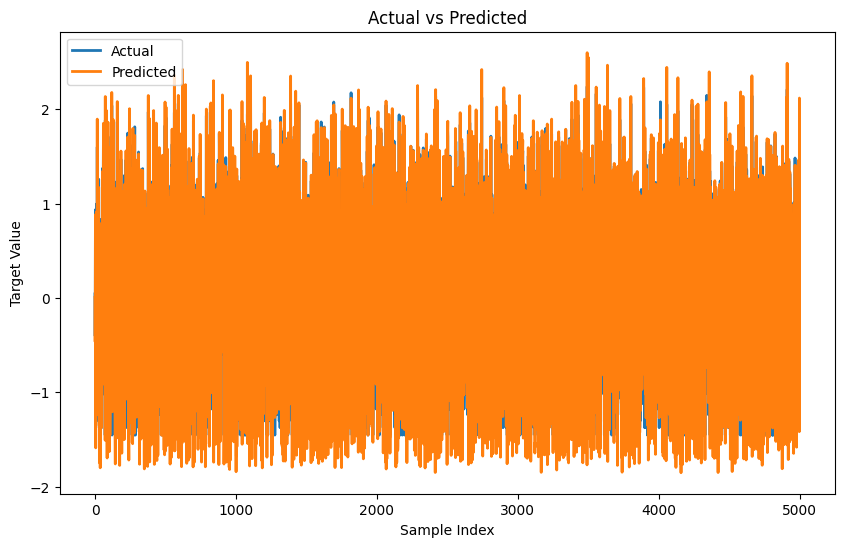

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y.values, label='Actual', linewidth=2)
plt.plot(y_test_pred, label='Predicted', linewidth=2)
plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()


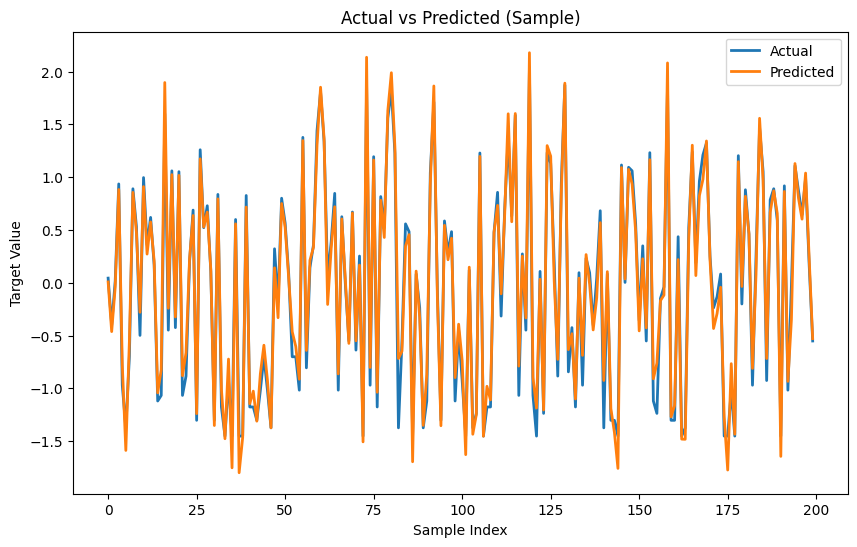

In [18]:
n = 200  
plt.figure(figsize=(10,6))
plt.plot(y.values[:n], label='Actual', linewidth=2)
plt.plot(y_test_pred[:n], label='Predicted', linewidth=2)
plt.title('Actual vs Predicted (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()


In [19]:
X = validation_data.drop('fire_weather_index_transformed', axis = 1)
y = validation_data['fire_weather_index_transformed']

In [20]:
y_test_pred = model.predict(X)
train_r2 = r2_score(y, y_test_pred)
train_mse = mean_squared_error(y, y_test_pred)
print('R²:', r2_score(y, y_test_pred))
print('MSE:', mean_squared_error(y, y_test_pred))

R²: 0.9806747303222992
MSE: 0.019587584349237734


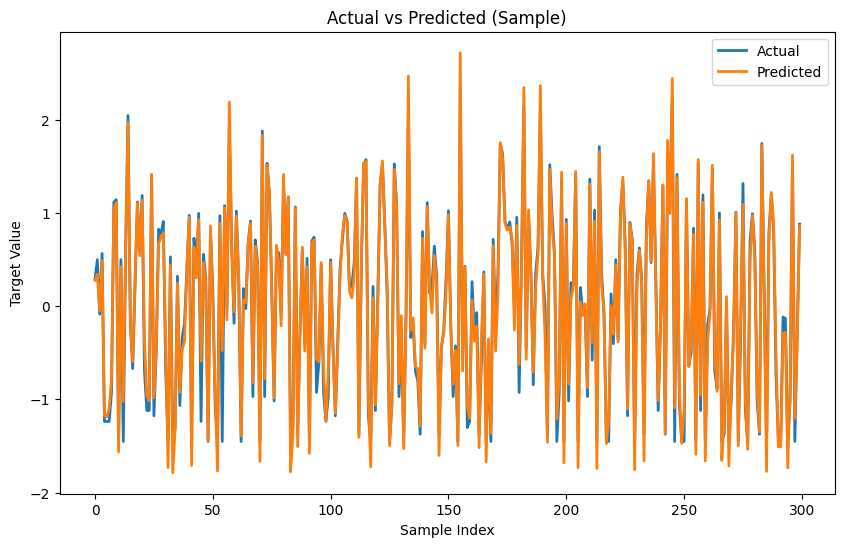

In [21]:
n = 300  
plt.figure(figsize=(10,6))
plt.plot(y.values[:n], label='Actual', linewidth=2)
plt.plot(y_test_pred[:n], label='Predicted', linewidth=2)
plt.title('Actual vs Predicted (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()
